# 12_MiniAlexNet-unsupervised-SBATCH


%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.simple_mlp_train_results import UnsupervisedMLPTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.training_results import CNNUnsupervisedTrainingResults
from src.load_MNIST import get_mnist_pairs_loader

In [5]:
batch_size = 32
subset_fraction = 0.05
validation_ratio = 6
seed = 42
selected_labels = [4, 9]

train_pair_dataloader, val_pair_dataloader = get_mnist_pairs_loader(
    batch_size=batch_size, train=True, subset_fraction=subset_fraction, validation_ratio=validation_ratio, seed=seed, 
    selected_labels=selected_labels
)
test_pair_dataloader = get_mnist_pairs_loader(
    batch_size=batch_size, train=False, subset_fraction=subset_fraction, 
    selected_labels=selected_labels
)

device: cpu
num_workers: 1
device: cpu
num_workers: 1


# Quick runs

```bash
(klab_env) (base) [clc926@compute-a-16-171 klab_rotation]$ sbatch sbatch_scripts/12_no-prune_CNN_fast.sh 
Submitted batch job 57048272
(klab_env) (base) [clc926@compute-a-16-171 klab_rotation]$ sbatch sbatch_scripts/12_activity-prune_CNN_fast.sh 
Submitted batch job 57048947
(klab_env) (base) [clc926@compute-a-16-171 klab_rotation]$ sbatch sbatch_scripts/12_random-prune_CNN_fast.sh 
Submitted batch job 57048825
```

## No prune

In [6]:
no_prune_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/no_prune_CNN_fast/sbatch-57048272_bs-32_sf-0.05_sl-49_vr-6_nti-10_pt-5_lmd-2_m-5.0_pmt-NoPrune_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'no_prune_CNN_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

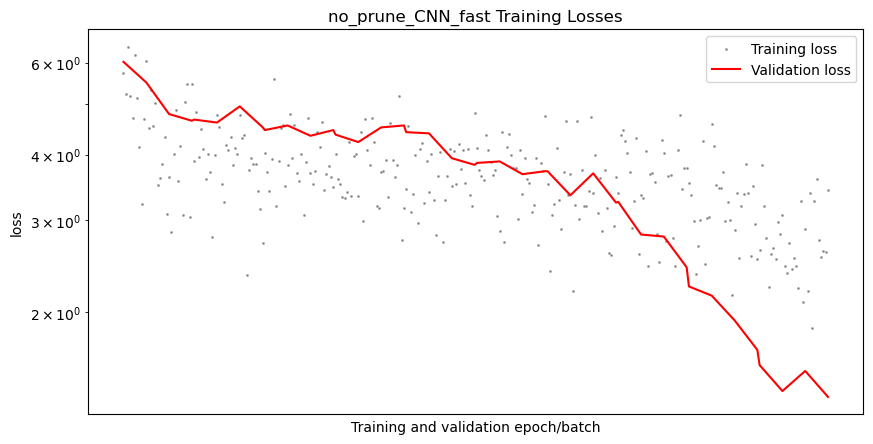

In [7]:
no_prune_results.plot_training_losses()

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'no_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

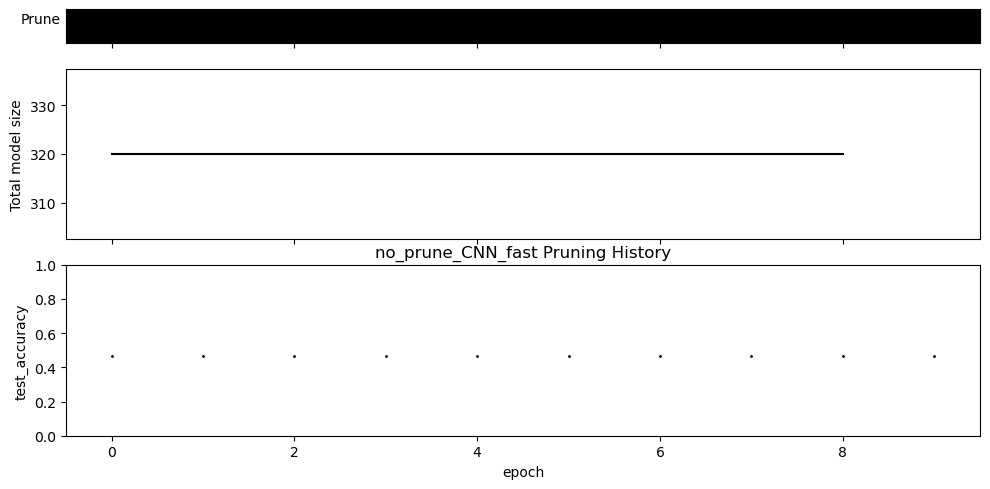

In [8]:
no_prune_results.plot_pruning(test_err_col='test_accuracy')

In [9]:
no_prune_results.set_trained_model(9)

(<Figure size 500x500 with 1 Axes>,
 <Axes: title={'center': '2D Embeddings of Image Pairs'}, xlabel='Embedding dimension 1', ylabel='Embedding dimension 2'>)

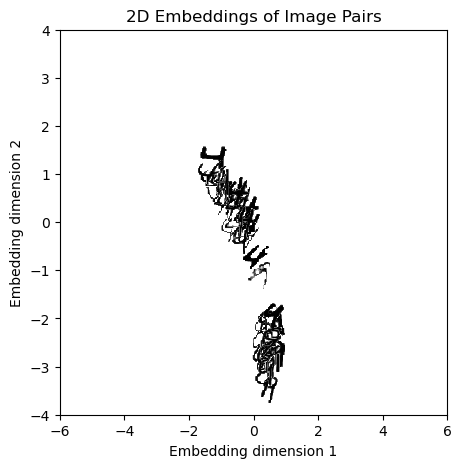

In [13]:
no_prune_results.plot_image_embeddings(test_pair_dataloader, num_pairs_per_batch=2)

## Random

In [15]:
rand_prune_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/random_prune_CNN_fast/sbatch-57048825_bs-32_sf-0.05_sl-49_vr-6_nti-10_pt-5_lmd-2_m-5.0_pmt-Random_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'random_prune_CNN_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

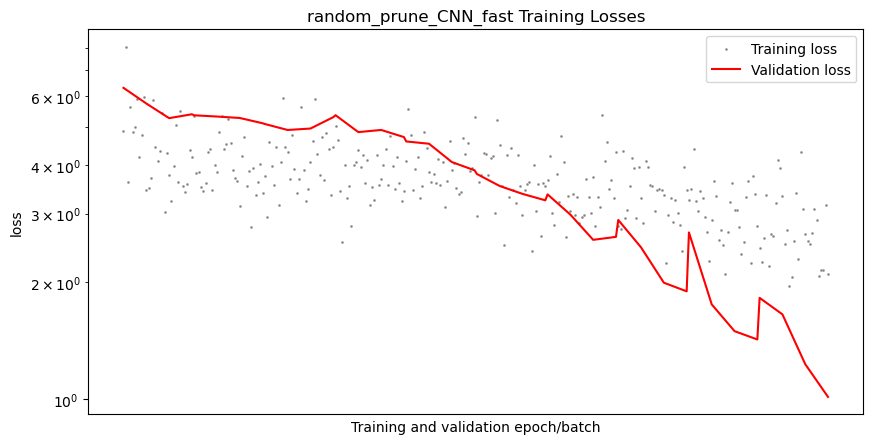

In [16]:
rand_prune_results.plot_training_losses()

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'random_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

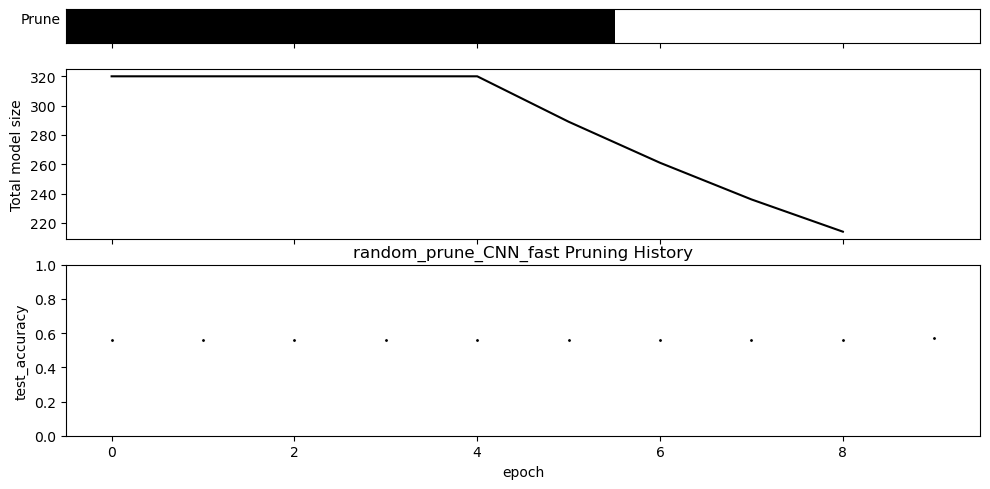

In [17]:
rand_prune_results.plot_pruning(test_err_col='test_accuracy')

## Activity

In [14]:
act_prune_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/activity_prune_CNN_fast/sbatch-57048947_bs-32_sf-0.05_sl-49_vr-6_nti-10_pt-5_lmd-2_m-5.0_pmt-Activity_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': 'activity_prune_CNN_fast Training Losses'}, xlabel='Training and validation epoch/batch', ylabel='loss'>)

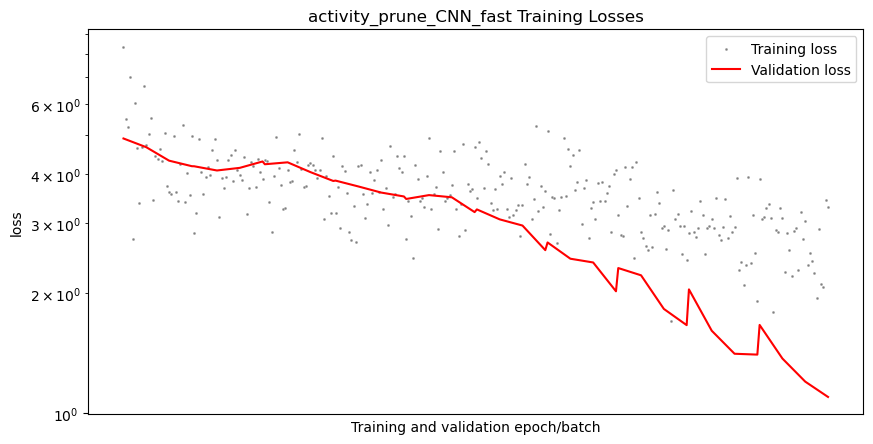

In [18]:
act_prune_results.plot_training_losses()

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'activity_prune_CNN_fast Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

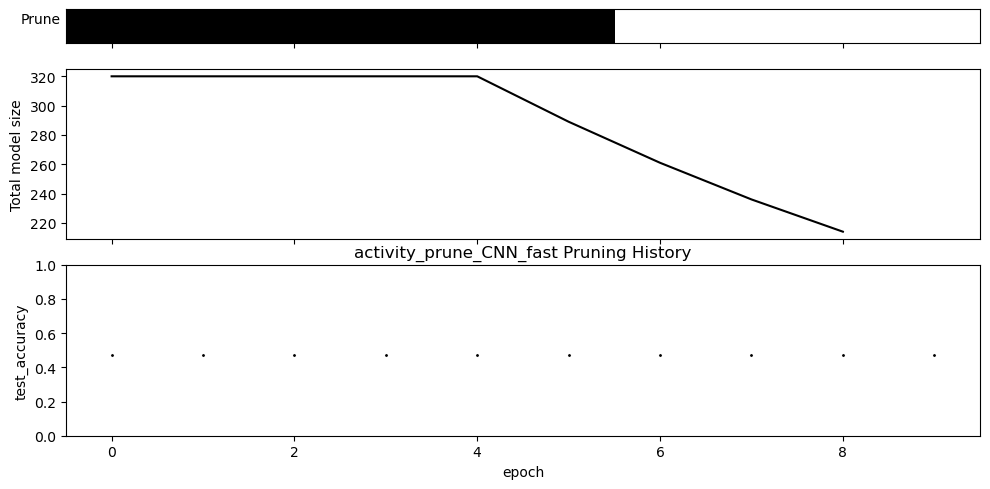

In [19]:
act_prune_results.plot_pruning()

# Full run

Increased GPU time request
```bash
$ sbatch sbatch_scripts/12_no-prune_CNN_full.sh 
Submitted batch job 57049645
$ sbatch sbatch_scripts/12_random-prune_CNN_full.sh 
Submitted batch job 57049422
$ sbatch sbatch_scripts/12_activity-prune_CNN_full.sh 
Submitted batch job 57049500
```

In [20]:
full_no_prune_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/no_prune_CNN_full/sbatch-57049645_bs-32_sf-0.1_sl-49_vr-6_nti-100_pt-75_lmd-2_m-5.0_pmt-NoPrune_g-0.1_lr-0.001_s-4")
full_act_prune_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/activity_prune_CNN_full/sbatch-57049500_bs-32_sf-0.1_sl-49_vr-6_nti-100_pt-75_lmd-2_m-5.0_pmt-Activity_g-0.1_lr-0.001_s-4")
full_rand_prune_results = CNNUnsupervisedTrainingResults("/home/clc926/Desktop/klab_rotation/outputs/12/random_prune_CNN_full/sbatch-57049422_bs-32_sf-0.1_sl-49_vr-6_nti-100_pt-75_lmd-2_m-5.0_pmt-Random_g-0.1_lr-0.001_s-4")

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'no_prune_CNN_full Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

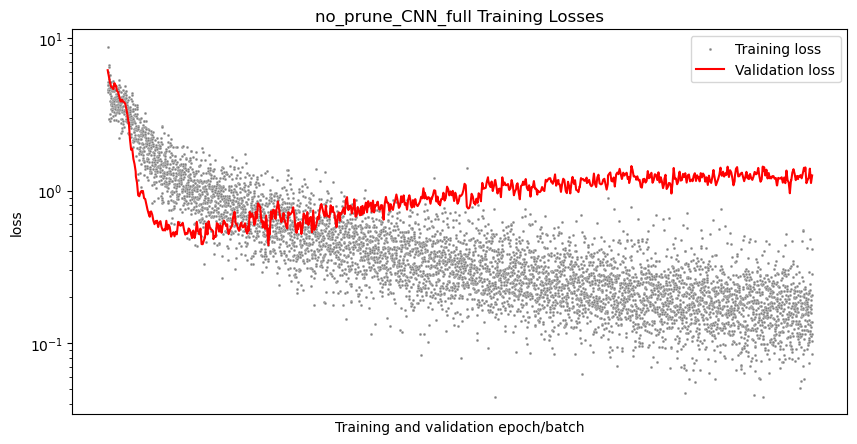

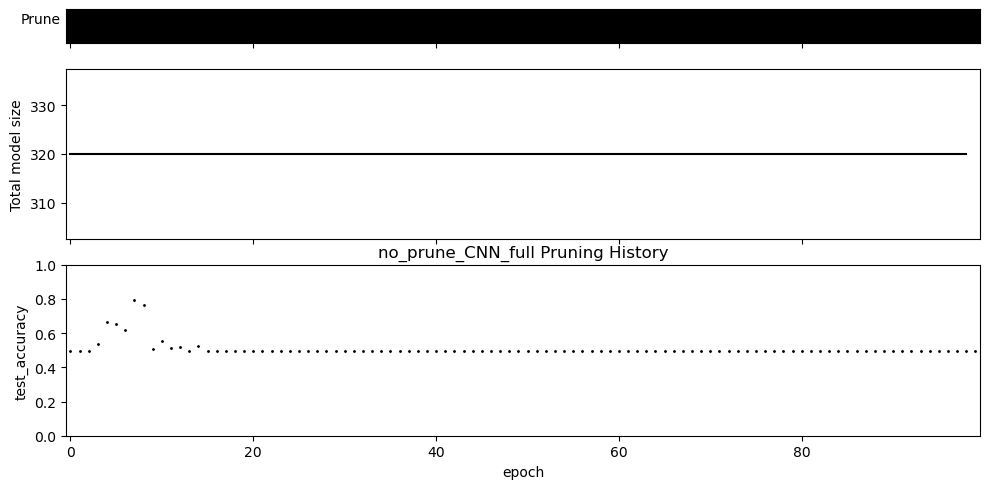

In [21]:
full_no_prune_results.plot_training_losses()
full_no_prune_results.plot_pruning()

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'activity_prune_CNN_full Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

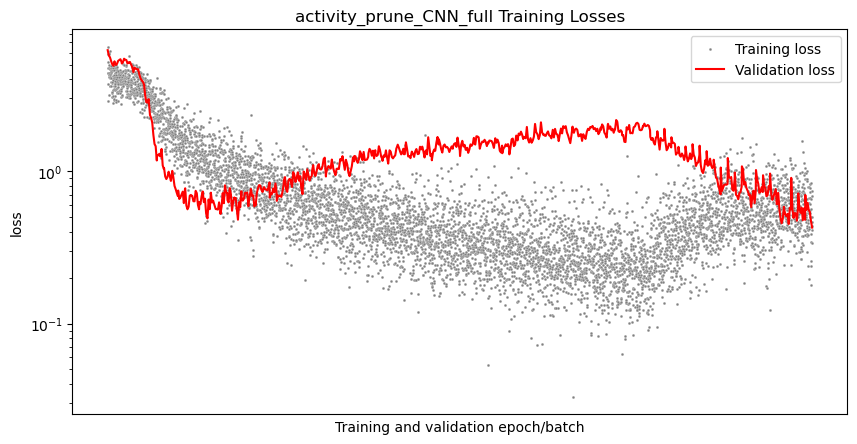

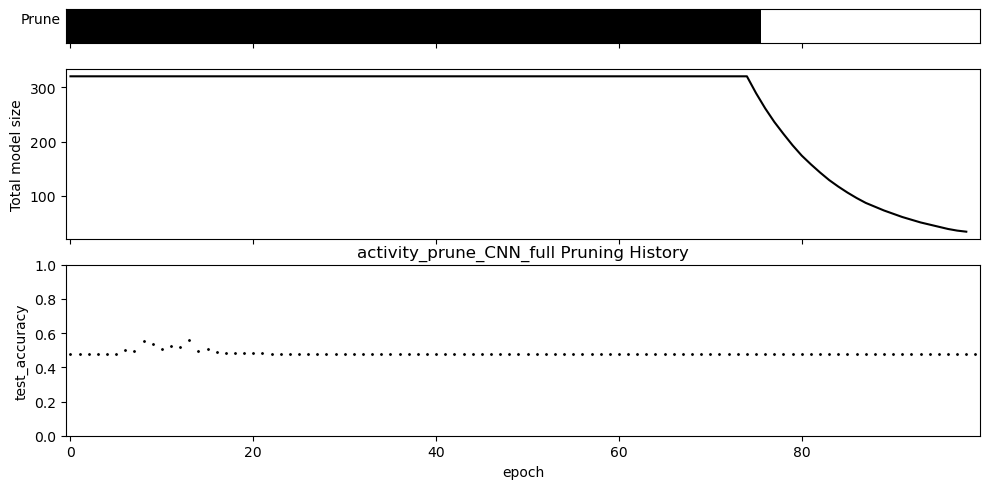

In [22]:
full_act_prune_results.plot_training_losses()
full_act_prune_results.plot_pruning()

(<Figure size 1000x500 with 3 Axes>,
 array([<Axes: ylabel='Prune'>, <Axes: ylabel='Total model size'>,
        <Axes: title={'center': 'random_prune_CNN_full Pruning History'}, xlabel='epoch', ylabel='test_accuracy'>],
       dtype=object))

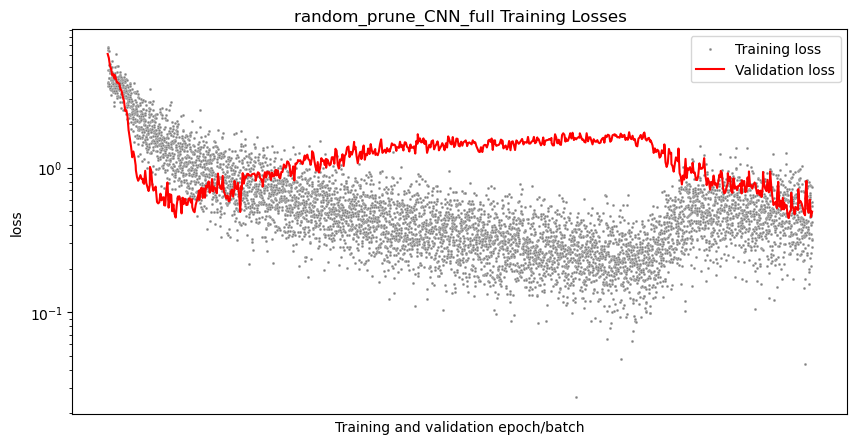

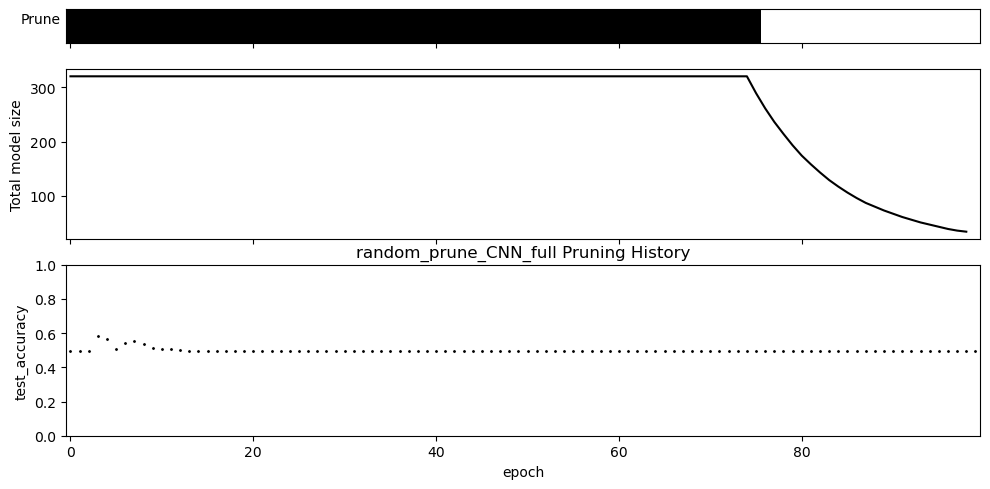

In [23]:
full_rand_prune_results.plot_training_losses()
full_rand_prune_results.plot_pruning()